In [ ]:
! pip install pyomo
! pip install glpk

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
#Read Data
df = pd.read_excel("C:\\Users\\Amirhossein\\Desktop\\Data.xlsx") 
df

,Number,Criteria,Best,Worst
0,1,Criteria 1,8,1
1,2,Criteria 2,2,5
2,3,Criteria 3,1,8


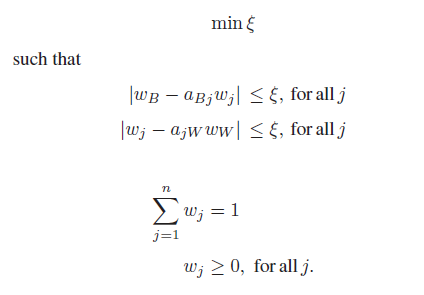

In [2]:
#=============================================================================
# Model
#=============================================================================
import pyomo.environ as pyo
Model = pyo.ConcreteModel()
BestNum=int(df.loc[df['Best'] == 1]["Number"])
WorstNum=int(df.loc[df['Worst'] == 1]["Number"])

# Set and variable
Model.i=pyo.RangeSet(1,df.shape[0])
Model.W=pyo.Var(Model.i, within=pyo.PercentFraction)
Model.ksi=pyo.Var(within=pyo.PositiveReals)

def obj1(model):
    return Model.ksi
Model.obj1=pyo.Objective(expr=obj1 ,sense=pyo.minimize)
# Model.obj1.pprint()

def Co1(Model, s):
    return (Model.W[BestNum]-df["Best"][s-1]*Model.W[s])<=Model.ksi
Model.Co1 = pyo.Constraint(Model.i , rule=Co1)
# Model.Co1.pprint()

def Co2(Model, s):
    return (Model.W[BestNum]-df["Best"][s-1]*Model.W[s])>=-Model.ksi
Model.Co2 = pyo.Constraint(Model.i , rule=Co2)
# Model.Co2.pprint()

def Co3(Model, s):
    return (Model.W[s]-df["Worst"][s-1]*Model.W[WorstNum])<=Model.ksi
Model.Co3 = pyo.Constraint(Model.i , rule=Co3)
# Model.Co3.pprint()

def Co4(Model, s):
    return (Model.W[s]-df["Worst"][s-1]*Model.W[WorstNum])>=-Model.ksi
Model.Co4 = pyo.Constraint(Model.i , rule=Co4)
# Model.Co4.pprint()

def Co5(Model):
    return sum(Model.W[i] for i in Model.i)==1
Model.Co5 = pyo.Constraint(rule=Co5)
# Model.Co5.pprint()

import pyomo.opt as pyopt
results=pyopt.SolverFactory("glpk").solve(Model, tee=True) # doctest: +SKIP

print("ksi= ",Model.ksi())
df["Weight"]=0.0
for i in Model.i:
    df["Weight"][i-1]=Model.W[i]()
df['rank'] = df['Weight'].rank()

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\AMIRHO~1\AppData\Local\Temp\tmpb8i0l7nq.glpk.raw --wglp
 C:\Users\AMIRHO~1\AppData\Local\Temp\tmp9_8cf6sx.glpk.glp --cpxlp C:\Users\AMIRHO~1\AppData\Local\Temp\tmpu0o4myw5.pyomo.lp
Reading problem data from 'C:\Users\AMIRHO~1\AppData\Local\Temp\tmpu0o4myw5.pyomo.lp'...
14 rows, 5 columns, 32 non-zeros
87 lines were read
Writing problem data to 'C:\Users\AMIRHO~1\AppData\Local\Temp\tmp9_8cf6sx.glpk.glp'...
72 lines were written
GLPK Simplex Optimizer 5.0
14 rows, 5 columns, 32 non-zeros
Preprocessing...
9 rows, 4 columns, 27 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  8.000e+00  ratio =  8.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 9
      0: obj =   0.000000000e+00 inf =   3.000e+00 (2)
      5: obj =   3.571428571e-02 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.0 Mb (42243 bytes)


In [3]:
df

,Number,Criteria,Best,Worst,Weight,rank
0,1,Criteria 1,8,1,0.071429,1.0
1,2,Criteria 2,2,5,0.321429,2.0
2,3,Criteria 3,1,8,0.607143,3.0
